# Data Wrangling and Exploratory Data Analysis
----------------------------------------------

In this notebook, I will be cleaning the data and performing exploratory data analysis to find the relevant features for the model to predict house prices.

Without further ado, let's get started.

# Setup

Importing the libraries and getting the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)

In [4]:
file_path = 'Initial Data.csv'
df = pd.read_csv(file_path)

# Data Wrangling

I will first start with cleaning of the data. The first step would be to get see the data.

## Info

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Dropping columns

It's apparent that columns Unnamed 0 and id need to be deleted. 

In [6]:
df.drop(labels=['id', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Summary

Now let's see the columns types in the dataframe. 

In [7]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Summary of the data

In [8]:
df.shape

(21613, 20)

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## NA Value Handling

We can see that _bedrooms_ and _bathrooms_ have null values because their count is less then 21613. We would be replacing them by the mean.

In [10]:
# Get mean
bathroom_mean = df['bathrooms'].mean()
bedroom_mean = df['bedrooms'].mean()

# Replace
df['bedrooms'].replace(to_replace=np.nan, value=bedroom_mean, inplace=True)
df['bathrooms'].replace(to_replace=np.nan, value=bathroom_mean, inplace=True)

# See the result
df[['bedrooms', 'bathrooms']].count()

bedrooms     21613
bathrooms    21613
dtype: int64

## Saving the cleaned data

The next step is to save the clean data. We will save it to a file named 'Clean Data.csv' 

In [11]:
df.to_csv('Clean Data.csv')

Now we can move onto learning insights from the data.

# Exploratory Analysis

## Data Summary

Let's see the statistical summary again with exploring the data in mind.

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Finding categorical and continous variables

We can see that the columns _floors, waterfront, view, condition,_ and _grade_ have few values and could be seen as categorical. Thus we should use a boxplot to explore the relationship between them.

As of the rest, a scatterplot would be a good idea.

In [13]:
# The columns
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
continous = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

## Continous

Let's explore the relationship of continous variables and price.

We would be using two methods:
* The Pearson coefficient
* Scatter plot

In [14]:
# Pearson coefficient
continous_df = df[continous]
continous_df.corrwith(df['price'])

sqft_living      0.702035
sqft_lot         0.089661
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
dtype: float64

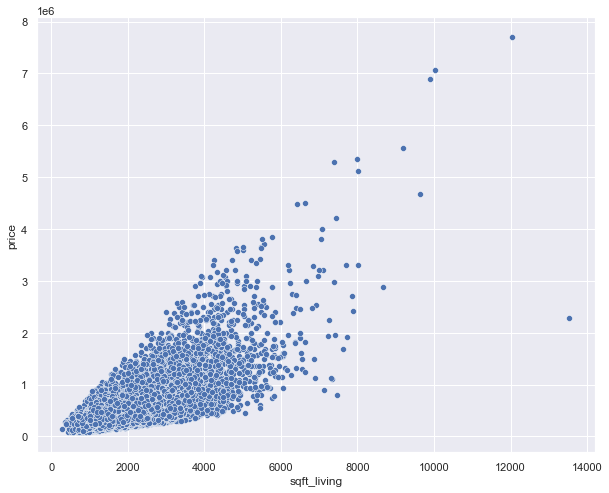

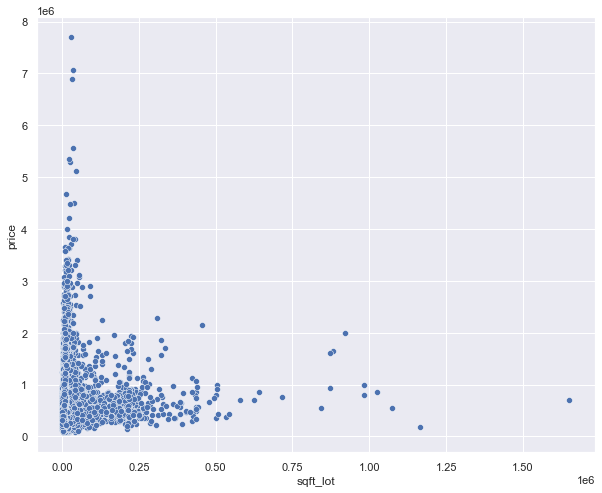

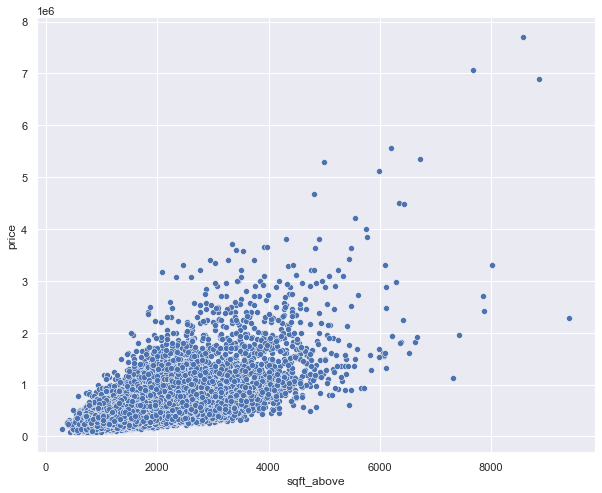

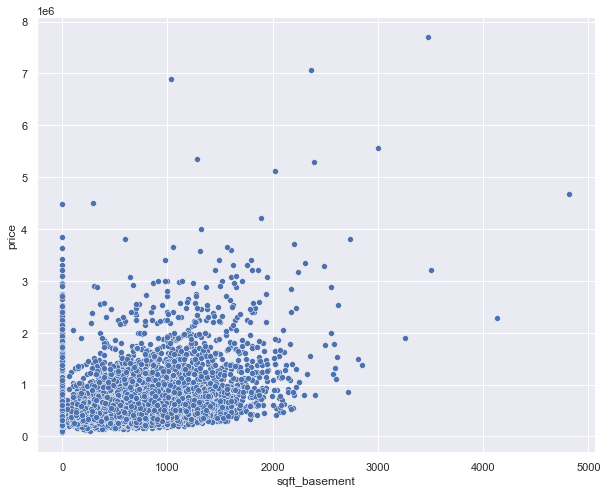

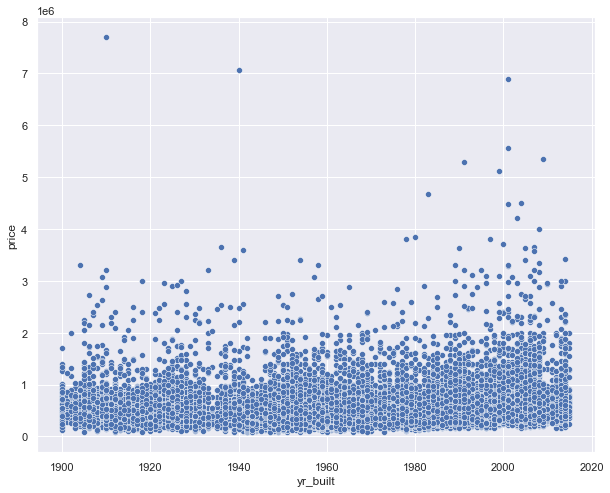

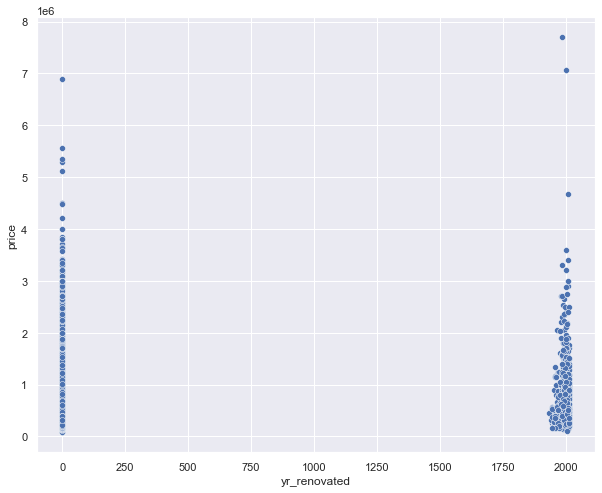

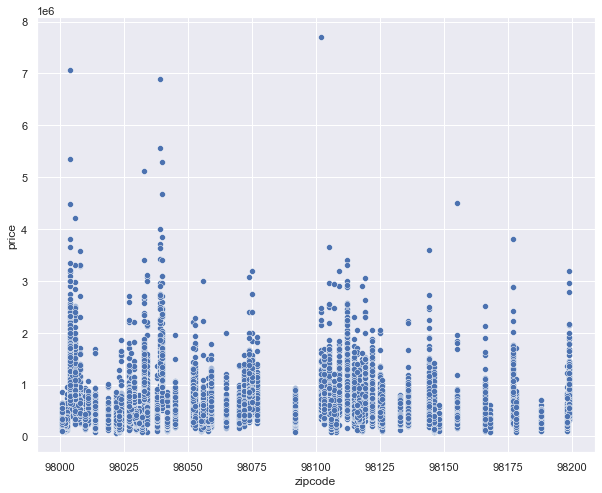

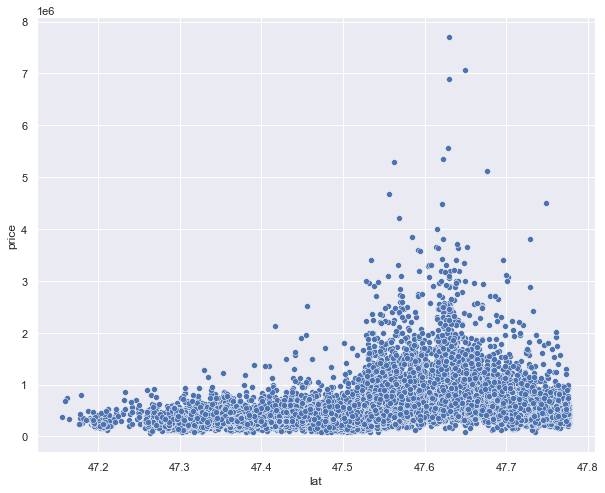

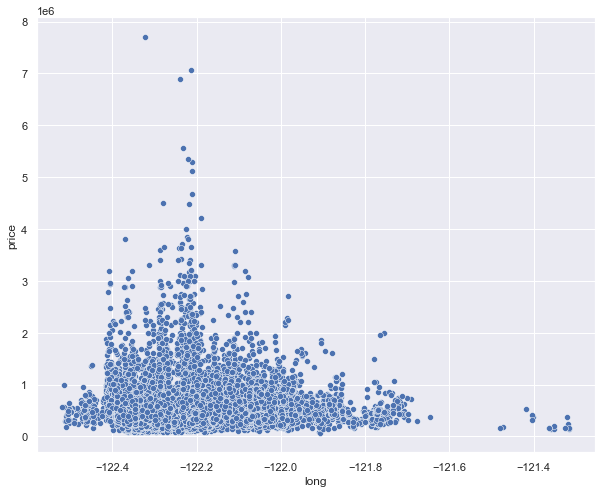

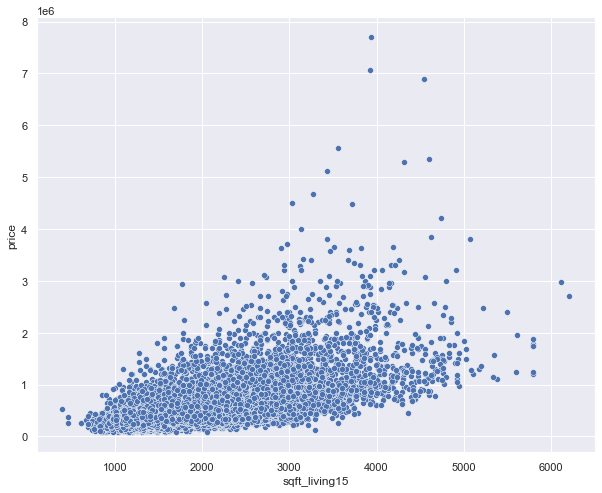

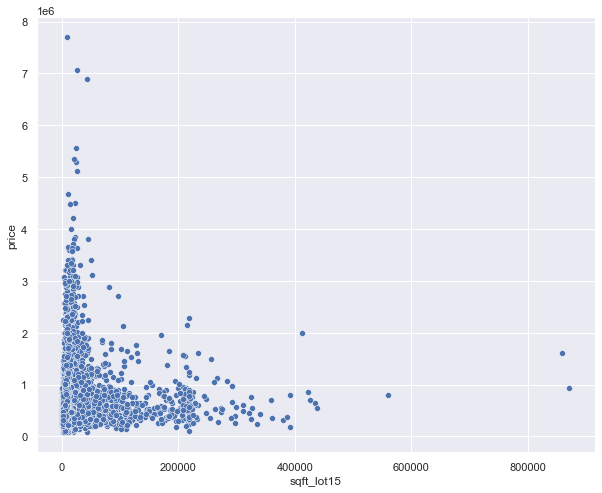

In [15]:
for column_name in continous:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=column_name, y='price', data=df)

We can see that the ones that might have correlation with price are _sqft_living, sqft_above, sqft_living15._ _lat,_ and _sqft_basement_ also have moderate correlation too.

### Statistical Significance

Let's find whether they are statistically significant or not. We would be using p-value for that.

In [16]:
pearson_coeff, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print("sqft_living -- Pearson's Coefficient is: ", pearson_coeff, " and the p-value is: ", p_value)

pearson_coeff, p_value = stats.pearsonr(df['sqft_living15'], df['price'])
print("sqft_living15 -- Pearson's Coefficient is: ", pearson_coeff, " and the p-value is: ", p_value)

pearson_coeff, p_value = stats.pearsonr(df['sqft_above'], df['price'])
print("sqft_above -- Pearson's Coefficient is: ", pearson_coeff, " and the p-value is: ", p_value)

pearson_coeff, p_value = stats.pearsonr(df['sqft_basement'], df['price'])
print("sqft_basement -- Pearson's Coefficient is: ", pearson_coeff, " and the p-value is: ", p_value)

pearson_coeff, p_value = stats.pearsonr(df['lat'], df['price'])
print("lat -- Pearson's Coefficient is: ", pearson_coeff, " and the p-value is: ", p_value)

sqft_living -- Pearson's Coefficient is:  0.7020350546118  and the p-value is:  0.0
sqft_living15 -- Pearson's Coefficient is:  0.585378903579568  and the p-value is:  0.0
sqft_above -- Pearson's Coefficient is:  0.6055672983560781  and the p-value is:  0.0
sqft_basement -- Pearson's Coefficient is:  0.32381602071198384  and the p-value is:  0.0
lat -- Pearson's Coefficient is:  0.3070034799952187  and the p-value is:  0.0


The p-value is extremely low to the point that it seems like 0.

Now, we can confidently say that these variables have correlation with price.

### Conclusion: Continous

The features that can predict price are _sqft_living, sqft_living15,_ and _sqft_above_.

## Categorical

Let's figure out the relationship between categorical variables and price. We will first plot them. 

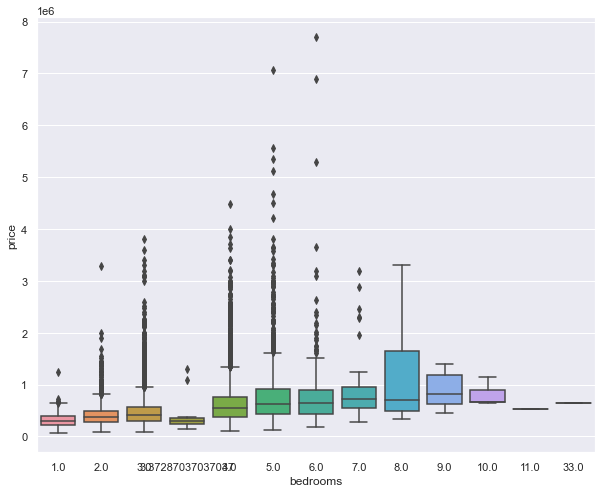

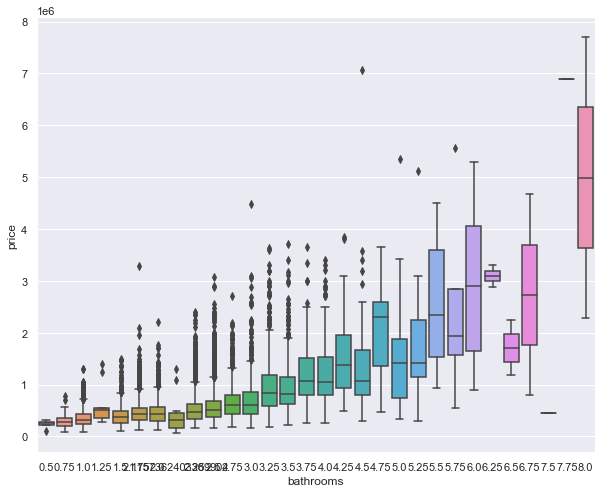

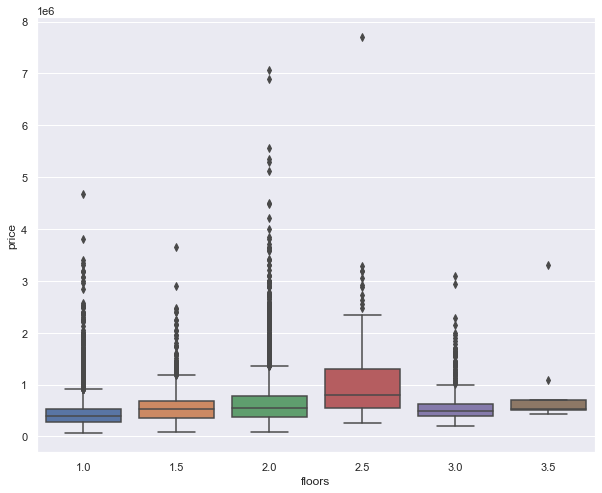

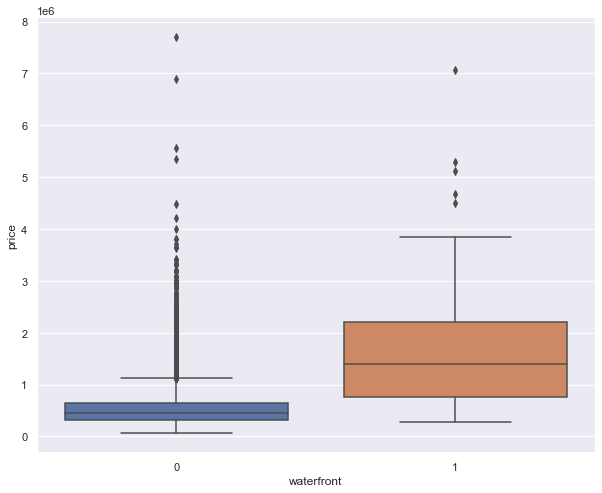

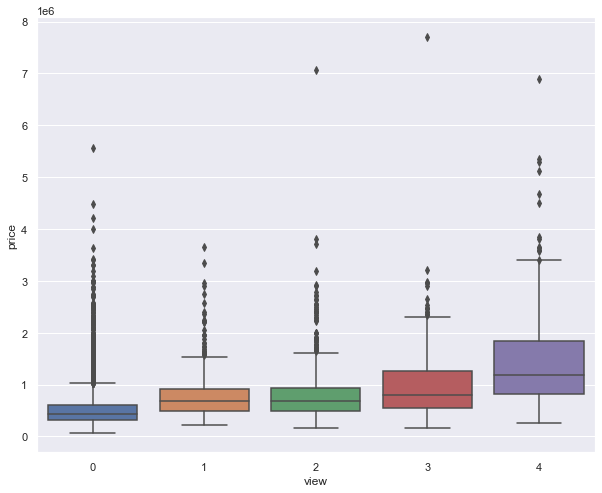

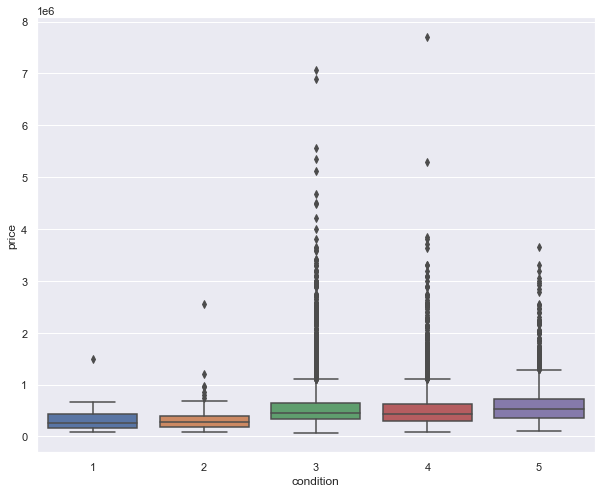

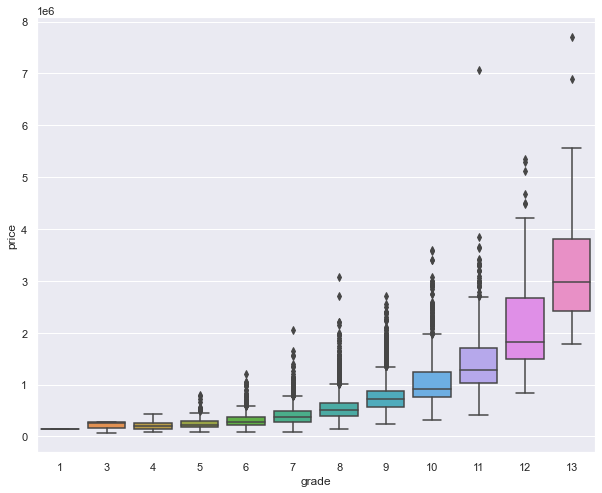

In [17]:
# Categorical
for column_name in categorical:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=column_name, y='price', data=df)

It seems that everything except condition would be a good predictor. 

### Removing problematic data

However, bedroom and bathroom look funky. We need to check that. 

Let's see the count of each bedroom and bathroom.

In [18]:
# Bedroom
grouped_by_bedroom = df.groupby('bedrooms')
grouped_by_bedroom.count()

,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,
1.00000,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
2.00000,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760
3.00000,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824
3.37287,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
4.00000,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882
5.00000,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
6.00000,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272
7.00000,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
8.00000,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [19]:
# Bathroom
grouped_by_bathroom = df.groupby('bathrooms')
grouped_by_bathroom.count()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bathrooms,,,,,,,,,,,,,,,,,,,
0.500000,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
0.750000,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
1.000000,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852
1.250000,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1.500000,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446
1.750000,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
2.000000,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930
2.115736,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2.250000,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047


In this we can see that there are non-sensical outliers such as 2.116 bathrooms and 3.37 bedrooms. 

We should remove those outliers. 

In [20]:
# Bathroom
bathroom_outliers = df[(df['bathrooms'] > 2) & (df['bathrooms'] < 2.25)]
df.drop(bathroom_outliers.index, inplace=True)

In [21]:
# Bedroom
bedroom_outliers = df[(df['bedrooms'] > 3) & (df['bedrooms'] < 4)]
df.drop(bedroom_outliers.index, inplace=True)

Lets create the plot again for them

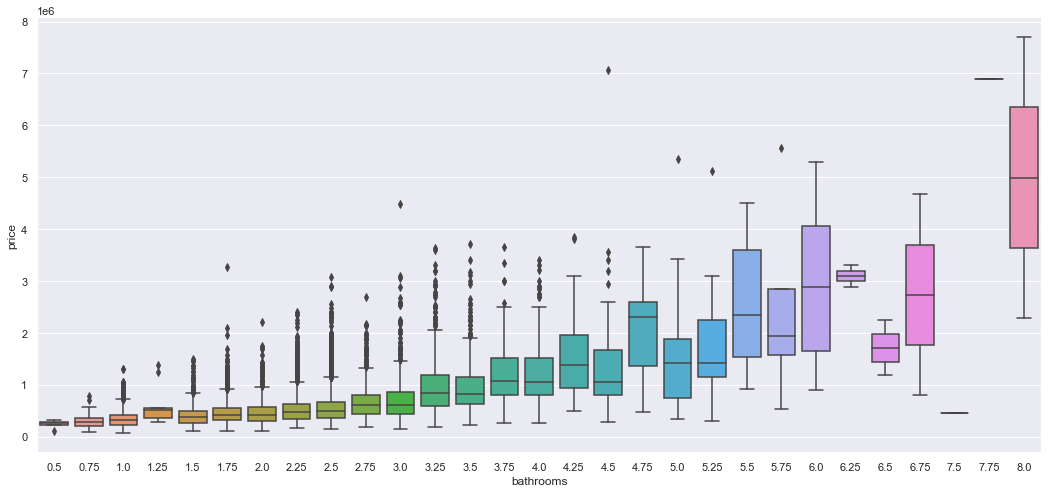

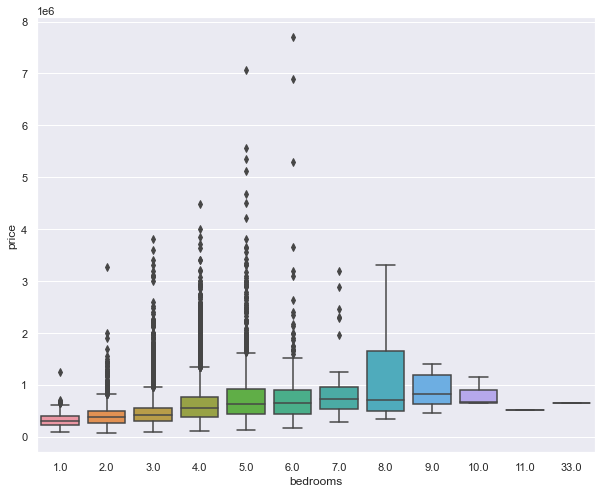

In [22]:
plt.figure(figsize=(18,8))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.figure(figsize=(10,8))
sns.boxplot(x='bedrooms', y='price', data=df);

Now it's easier to see the relationship.

### Conclusion: Categorical

We concluded that the variables of interest are _bedrooms, bathrooms, waterfront, view,_ and _grade_

## Saving the finalized data

We did some changes to the data. We should save it to be used in the analysis. Let's save it in the 'Final Data.csv' since we would be using this file to make the model.

In [23]:
df.to_csv('Final Data.csv')

## Conclusion

The features that we found that we can use to predict the house price are:
* sqft_above
* sqft_living15
* sqft_living
* sqft_basement
* bedrooms
* bathrooms
* waterfront
* floors
* lat
* view 
* grade

# Author
By Abhinav Garg